El valor interpolado en 7200 metros es: 399.0259 hPa.


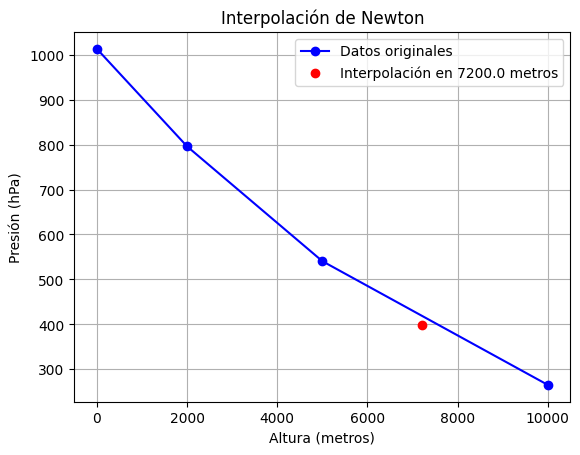

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de la tabla
x = np.array([0, 2000, 5000, 10000])  # Altura en metros
y = np.array([1013.25, 796.1, 540.5, 265.0])  # Presión en hPa

# Valor en el que quieres interpolar
x_interpolar = 7200  # Ejemplo de altura en metros para interpolar

# Función para calcular la interpolación de Newton
def newton_interpolation(x, y, x_interpolar):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])

    interpolacion = coef[0, 0]
    for i in range(1, n):
        termino = coef[0, i]
        for j in range(i):
            termino *= (x_interpolar - x[j])
        interpolacion += termino

    return interpolacion

# Realiza la interpolación para el valor dado
y_interpolado = newton_interpolation(x, y, x_interpolar)

# Muestra el resultado
print(f"El valor interpolado en {x_interpolar} metros es: {y_interpolado:.4f} hPa.")

# Graficar los datos originales y el valor interpolado
plt.plot(x, y, 'bo-', label='Datos originales')
plt.scatter(x_interpolar, y_interpolado, color='red', zorder=5, label=f'Interpolación en {x_interpolar:.1f} metros')
plt.title('Interpolación de Newton')
plt.xlabel('Altura (metros)')
plt.ylabel('Presión (hPa)')
plt.legend()
plt.grid(True)
plt.show()
